# 基于python的MSSP期刊关键词词频分析
## 1. 爬取数据
### 从26到154卷，2012年-2021年，下载期刊的pdf文件

In [33]:
import urllib.request
import re
import os
from bs4 import BeautifulSoup
import random
import numpy as np

In [14]:
# open the url and read
def getHtml(url):
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36'} 
    req = urllib.request.Request(url=url, headers=headers) 
    page = urllib.request.urlopen(req)
    html = page.read().decode('utf-8')
    page.close()
    return html

def getLink(raw_url,index):
    num_paper = 0
    html = getHtml(raw_url)
    bs = BeautifulSoup(html, 'html.parser') #解析网页
    hyperlink = bs.find_all('a')  #获取所有超链接
    file = open('Link.txt', 'a')
    file.write(f'{index}\n')
    for h in hyperlink:
        hh = h.get('href')
        if hh and 'science/article/pii' in hh and 'pdf' not in hh:  #筛选链接
            file.write(hh)   #写入到“Link.txt”文件中
            num_paper = num_paper+1
            file.write('\n')
    file.close()
    return num_paper

os.chdir('C:\\Users\\Li\\Desktop')
# os.mkdir('pdf_download')
os.chdir(os.path.join(os.getcwd(), 'pdf_download'))
num = 0
num_paper = np.zeros(155)
for index in range(155)[26:]:
    raw_url_start = 'https://www.sciencedirect.com/journal/mechanical-systems-and-signal-processing/vol/'
    raw_url_end = '/suppl/C'
    raw_url = raw_url_start + str(index) + raw_url_end
    num_paper[index]=getLink(raw_url,index) 
    if index < 40:
        print(f'成功写入第{index}期链接')
    elif index == 40:
        print('······')
    num = num + 1
num_tol = np.sum(num_paper)
print(f'成功写入所有链接，共{num}期，共{num_tol}篇文章')

成功写入第26期链接
成功写入第27期链接
成功写入第28期链接
成功写入第29期链接
成功写入第30期链接
成功写入第31期链接
成功写入第32期链接
成功写入第33期链接
成功写入第34期链接
成功写入第35期链接
成功写入第36期链接
成功写入第37期链接
成功写入第38期链接
成功写入第39期链接
······
成功写入所有链接，共129期，共5035.0篇文章


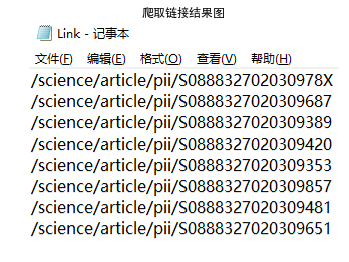

In [255]:
os.chdir('C:\\Users\\Li\\Desktop')
lena = mpimg.imread('out_link.png') # 读取和代码处于同一目录下的 lena.png
# 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
plt.title('爬取链接结果图')
plt.imshow(lena) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

In [9]:
# open the url and read
def getHtml(url):
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36'} 
    req = urllib.request.Request(url=url, headers=headers) 
    page = urllib.request.urlopen(req)
    html = page.read().decode('utf-8')
    page.close()
    return html

def getLink(raw_url,index):
    num_paper = 0
    html = getHtml(raw_url)
    bs = BeautifulSoup(html, 'html.parser') #解析网页
    hyperlink = bs.find_all('a')  #获取所有超链接
    file = open('Link2021.txt', 'a')
    file.write(f'{index}\n')
    for h in hyperlink:
        hh = h.get('href')
        if hh and 'science/article/pii' in hh and 'pdf' not in hh:  #筛选链接
            file.write(hh)   #写入到“Link.txt”文件中
            num_paper = num_paper+1
            file.write('\n')
    file.close()
    return num_paper

os.chdir('C:\\Users\\Li\\Desktop')
# os.mkdir('pdf_download')
os.chdir(os.path.join(os.getcwd(), 'pdf_download'))
num = 0
num_paper = np.zeros(155)
for index in range(155)[146:]:
    raw_url_start = 'https://www.sciencedirect.com/journal/mechanical-systems-and-signal-processing/vol/'
    raw_url_end = '/suppl/C'
    raw_url = raw_url_start + str(index) + raw_url_end
    num_paper[index]=getLink(raw_url,index) 
    if index < 150:
        print(f'成功写入第{index}期链接')
    elif index == 150:
        print('······')
    num = num + 1
num_tol = np.sum(num_paper)
print(f'成功写入所有链接，共{num}期，共{num_tol}篇文章')

成功写入第146期链接
成功写入第147期链接
成功写入第148期链接
成功写入第149期链接
······
成功写入所有链接，共9期，共518.0篇文章


### 数据爬取量太大
### 分批爬取，这里只展示2021年爬取结果

In [10]:
def getFile(url):
    file_name = url.split('/')[-2] +'.pdf'
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36'} 
    req = urllib.request.Request(url=url, headers=headers) 
    u = urllib.request.urlopen(req) 
    f = open(file_name, 'wb')

    block_sz = 8192
    while True:
        buffer = u.read(block_sz)
        if not buffer:
            break

        f.write(buffer)
    f.close()

i = 26
num = 0
os.chdir('C:\\Users\\Li\\Desktop\\pdf_download')
for line in open("Link2021.txt",'r'):
    if line.startswith(('1','2','3','4','5','6','7','8','9')):
        line = line[:-1]
        if line == '26':
            print('正在下载2012年期刊')
            os.chdir('C:\\Users\\Li\\Desktop\\pdf_download')
            os.mkdir('2012')
            os.chdir(os.path.join('C:\\Users\\Li\\Desktop\\pdf_download', '2012'))
        elif line == '34':
            print('正在下载2013年期刊')
            os.chdir('C:\\Users\\Li\\Desktop\\pdf_download')
            os.mkdir('2013')
            os.chdir(os.path.join('C:\\Users\\Li\\Desktop\\pdf_download', '2013'))
        elif line == '42':
            print('正在下载2014年期刊')
            os.chdir('C:\\Users\\Li\\Desktop\\pdf_download')
            os.mkdir('2014')
            os.chdir(os.path.join('C:\\Users\\Li\\Desktop\\pdf_download', '2014')) 
        elif line == '50':
            print('正在下载2015年期刊')
            os.chdir('C:\\Users\\Li\\Desktop\\pdf_download')
            os.mkdir('2015')
            os.chdir(os.path.join('C:\\Users\\Li\\Desktop\\pdf_download', '2015')) 
        elif line == '66':
            print('正在下载2016年期刊')
            os.chdir('C:\\Users\\Li\\Desktop\\pdf_download')
            os.mkdir('2016')
            os.chdir(os.path.join('C:\\Users\\Li\\Desktop\\pdf_download', '2016')) 
        elif line == '82':
            print('正在下载2017年期刊')
            os.chdir('C:\\Users\\Li\\Desktop\\pdf_download')
            os.mkdir('2017')
            os.chdir(os.path.join('C:\\Users\\Li\\Desktop\\pdf_download', '2017')) 
        elif line == '98':
            print('正在下载2018年期刊')
            os.chdir('C:\\Users\\Li\\Desktop\\pdf_download')
            os.mkdir('2018')
            os.chdir(os.path.join('C:\\Users\\Li\\Desktop\\pdf_download', '2018')) 
        elif line == '114':
            print('正在下载2019年期刊')
            os.chdir('C:\\Users\\Li\\Desktop\\pdf_download')
            os.mkdir('2019')
            os.chdir(os.path.join('C:\\Users\\Li\\Desktop\\pdf_download', '2019')) 
        elif line == '135':
            print('正在下载2020年期刊')
            os.chdir('C:\\Users\\Li\\Desktop\\pdf_download')
            os.mkdir('2020')
            os.chdir(os.path.join('C:\\Users\\Li\\Desktop\\pdf_download', '2020')) 
        elif line == '146':
            print('正在下载2021年期刊')
            os.chdir('C:\\Users\\Li\\Desktop\\pdf_download')
            os.mkdir('2021')
            os.chdir(os.path.join('C:\\Users\\Li\\Desktop\\pdf_download', '2021')) 
    elif line.startswith('/science'):
        line = line[:-1]
        root1_url = 'https://www.sciencedirect.com'
        root2_url = '/pdfft?isDTMRedir=true&download=true'
        url = root1_url + line + root2_url
        getFile(url)
        num = num + 1
        
print(f'成功下载完2021年期刊，共{num}篇文章')

正在下载2021年期刊
成功下载完2021年期刊，共518篇文章


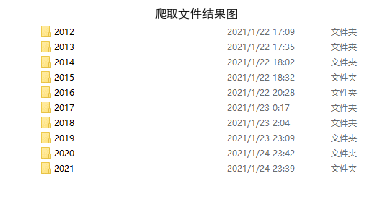

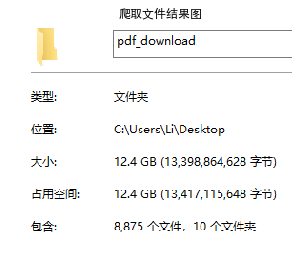

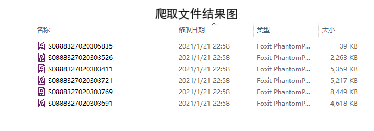

In [256]:
lena = mpimg.imread('out2.png') # 读取和代码处于同一目录下的 lena.png
# 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
plt.title('爬取文件结果图')
plt.imshow(lena) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
lena = mpimg.imread('out3.png') # 读取和代码处于同一目录下的 lena.png
# 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
plt.title('爬取文件结果图')
plt.imshow(lena) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
lena = mpimg.imread('out4.png') # 读取和代码处于同一目录下的 lena.png
# 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
plt.title('爬取文件结果图')
plt.imshow(lena) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

## 2.数据清洗
### pdf转txt并提取关键词 

In [17]:
import sys
import importlib
importlib.reload(sys)

from pdfminer.pdfparser import PDFParser, PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LTTextBoxHorizontal, LAParams
from pdfminer.pdfinterp import PDFTextExtractionNotAllowed

In [20]:
def readPDF(path, toPath):
    # 以二进制形式打开pdf文件
    with open(path, "rb") as f:
        # 创建一个pdf文档分析器
        parser = PDFParser(f)
        # 创建pdf文档
        pdfFile = PDFDocument()
        # 链接分析器与文档对象
        parser.set_document(pdfFile)
        pdfFile.set_parser(parser)
        # 提供初始化密码
        pdfFile.initialize()
        # 检测文档是否提供txt转换
    if not pdfFile.is_extractable:
        raise PDFTextExtractionNotAllowed
    else:
        # 解析数据
        # 数据管理
        manager = PDFResourceManager()
        # 创建一个PDF设备对象
        laparams = LAParams()
        device = PDFPageAggregator(manager, laparams=laparams)
        # 解释器对象
        interpreter = PDFPageInterpreter(manager, device)

        # 开始循环处理，每次处理一页
        for page in pdfFile.get_pages():
            interpreter.process_page(page)
            layout = device.get_result()
            for x in layout:
                if(isinstance(x, LTTextBoxHorizontal)):
                    with open(toPath, "a",encoding='utf-8') as f:
                        str = x.get_text()
                        # print(str)
                        f.write(str+"\n")
                        
def getKeywords(filename,filename_key):
    file = open(filename, 'r',encoding='utf-8')
    file_k = open(filename_key,'a',encoding='utf-8')
    content = file.read()
    startStr = 'Keywords:'
    endStr = '\n\n'
    try:
        startIndex = content.index(startStr)
        endIndex = content[startIndex:].index(endStr)
        con_key = content[startIndex+len(startStr):startIndex+endIndex]
        file.close()
        file_k.write(con_key)
        file_k.write('\n')
        file_k.close()
    except:
#         print('该文件无关键字')
        file.close()
        file_k.close()

year_list = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
year_num = np.zeros(10)
i = 0
for year in year_list:
    os.chdir(os.path.join('C:\\Users\\Li\\Desktop\\pdf_download',year))
    dirs = os.getcwd()
    list = os.listdir(dirs)
    year_num[i] = len(list)
    i = i + 1
    filename_key = 'Keywords' + year + '.txt'
    print(f'正在提取{year}年期刊关键词')
    for path in list:
#         print(filename)
        toPath = path.split('.')[0] +'.txt'
        readPDF(path, toPath)
        getKeywords(toPath, filename_key)

print(f'成功提取完所有期刊关键词')

正在提取2012年期刊关键词
正在提取2013年期刊关键词
正在提取2014年期刊关键词
正在提取2015年期刊关键词
正在提取2016年期刊关键词
正在提取2017年期刊关键词
正在提取2018年期刊关键词
正在提取2019年期刊关键词


PDFSyntaxError: No /Root object! - Is this really a PDF?

### 爬取中断 继续进行

In [21]:
def readPDF(path, toPath):
    # 以二进制形式打开pdf文件
    with open(path, "rb") as f:
        # 创建一个pdf文档分析器
        parser = PDFParser(f)
        # 创建pdf文档
        pdfFile = PDFDocument()
        # 链接分析器与文档对象
        parser.set_document(pdfFile)
        pdfFile.set_parser(parser)
        # 提供初始化密码
        pdfFile.initialize()
        # 检测文档是否提供txt转换
    if not pdfFile.is_extractable:
        raise PDFTextExtractionNotAllowed
    else:
        # 解析数据
        # 数据管理
        manager = PDFResourceManager()
        # 创建一个PDF设备对象
        laparams = LAParams()
        device = PDFPageAggregator(manager, laparams=laparams)
        # 解释器对象
        interpreter = PDFPageInterpreter(manager, device)

        # 开始循环处理，每次处理一页
        for page in pdfFile.get_pages():
            interpreter.process_page(page)
            layout = device.get_result()
            for x in layout:
                if(isinstance(x, LTTextBoxHorizontal)):
                    with open(toPath, "a",encoding='utf-8') as f:
                        str = x.get_text()
                        # print(str)
                        f.write(str+"\n")
                        
def getKeywords(filename,filename_key):
    file = open(filename, 'r',encoding='utf-8')
    file_k = open(filename_key,'a',encoding='utf-8')
    content = file.read()
    startStr = 'Keywords:'
    endStr = '\n\n'
    try:
        startIndex = content.index(startStr)
        endIndex = content[startIndex:].index(endStr)
        con_key = content[startIndex+len(startStr):startIndex+endIndex]
        file.close()
        file_k.write(con_key)
        file_k.write('\n')
        file_k.close()
    except:
#         print('该文件无关键字')
        file.close()
        file_k.close()

year_list = ['2020','2021']
year_num = np.zeros(2)
i = 0
for year in year_list:
    os.chdir(os.path.join('C:\\Users\\Li\\Desktop\\pdf_download',year))
    dirs = os.getcwd()
    list = os.listdir(dirs)
    year_num[i] = len(list)
    i = i + 1
    filename_key = 'Keywords' + year + '.txt'
    print(f'正在提取{year}年期刊关键词')
    for path in list:
#         print(filename)
        toPath = path.split('.')[0] +'.txt'
        readPDF(path, toPath)
        getKeywords(toPath, filename_key)

print(f'成功提取完所有期刊关键词')

正在提取2020年期刊关键词
正在提取2021年期刊关键词
成功提取完所有期刊关键词


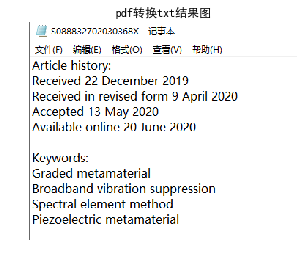

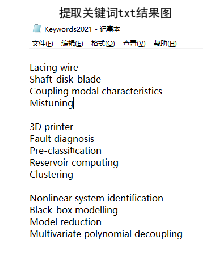

In [257]:
lena = mpimg.imread('out5.png') # 读取和代码处于同一目录下的 lena.png
# 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
plt.title('pdf转换txt结果图')
plt.imshow(lena) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
lena = mpimg.imread('out6.png') # 读取和代码处于同一目录下的 lena.png
# 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
plt.title('提取关键词txt结果图')
plt.imshow(lena) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

## 3. 数据分析及可视化
### 3.1 分析每年发表文章数量变化情况

In [125]:
year_list = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
year_num = np.zeros(len(year_list))
i = 0
for year in year_list:
    os.chdir(os.path.join('C:\\Users\\Li\\Desktop\\pdf_download',year))
    dirs = os.getcwd()
    list_year = os.listdir(dirs)
    x = (len(list_year)-1)/2
#     print(x)
    year_num[i] = int(x)
    i = i+1

In [240]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # mpimg 用于读取图片

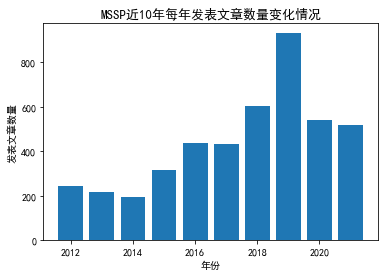

In [126]:
x = np.linspace(2012,2021,10,dtype=int)
plt.bar(x,year_num)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xlabel('年份', fontsize=10)
plt.ylabel('发表文章数量', fontsize=10)
# 设置图例文字大小
plt.title('MSSP近10年每年发表文章数量变化情况',fontsize=13)
# 设置xy轴刻度文字大小
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### 3.2 分析每年最高词频的10个关键词

In [142]:
year_list = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
for year in year_list:
    os.chdir(os.path.join('C:\\Users\\Li\\Desktop\\pdf_download',year))
    filename_key = 'Keywords' + year + '.txt'
    def get_text():
        f = open(filename_key,'r',encoding='utf-8')
        text = f.read().lower()
#         print(text)
        for i in '!@#$%^&*()_¯+-;:`~\'"<>=./?,':
            text = text.replace(i,' ')
        return text.split()

    ls = get_text()
#     print(ls)
    counts = {}
#     print(len(ls))
    for i in ls:
        counts[i] = counts.get(i,0) + 1

    iteams = list(counts.items())
    # print(iteams)
    iteams.sort(key=lambda x:x[1],reverse=True)
    
    print(f'{year}年词频最高的10个词为：')
    for i in iteams[0:10]:
        print(i)
        
    print('\n')

2012年词频最高的10个词为：
('analysis', 52)
('identiﬁcation', 50)
('modal', 45)
('model', 35)
('vibration', 31)
('monitoring', 27)
('system', 25)
('structural', 25)
('method', 25)
('fault', 22)


2013年词频最高的10个词为：
('analysis', 47)
('fault', 36)
('diagnosis', 29)
('vibration', 28)
('model', 28)
('nonlinear', 27)
('monitoring', 26)
('identiﬁcation', 26)
('modal', 25)
('detection', 24)


2014年词频最高的10个词为：
('analysis', 68)
('time', 32)
('identification', 32)
('vibration', 31)
('nonlinear', 29)
('modal', 28)
('system', 23)
('model', 23)
('detection', 23)
('frequency', 22)


2015年词频最高的10个词为：
('analysis', 65)
('vibration', 51)
('identification', 45)
('model', 40)
('monitoring', 38)
('control', 37)
('fault', 36)
('modal', 29)
('system', 28)
('structural', 27)


2016年词频最高的10个词为：
('analysis', 82)
('control', 67)
('vibration', 66)
('fault', 61)
('system', 53)
('modal', 48)
('frequency', 45)
('model', 43)
('time', 43)
('transform', 41)


2017年词频最高的10个词为：
('model', 81)
('analysis', 76)
('control', 71)
('system

### 3.3 以2021年为例进行数据词频分析、饼状图分析及词云分析 

2021年词频最高的10个词为：
('control', 89)
('analysis', 84)
('vibration', 76)
('model', 62)
('system', 61)
('nonlinear', 55)
('identiﬁcation', 53)
('monitoring', 51)
('structural', 47)
('method', 45)




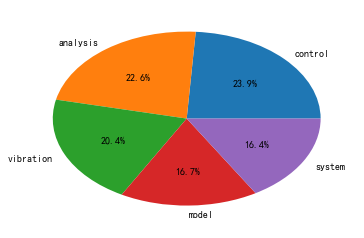

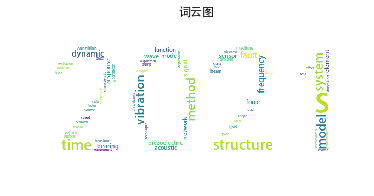

In [244]:
year = input('请输入统计词频年份：')
os.chdir(os.path.join('C:\\Users\\Li\\Desktop\\pdf_download',year))
filename_key = 'Keywords' + year + '.txt'
b = []
def get_text():
    f = open(filename_key,'r',encoding='utf-8')
    text = f.read().lower()
#        print(text)
    for i in '!@#$%^&*()_¯+-;:`~\'"<>=./?,':
            text = text.replace(i,' ')
    return text.split()

ls = get_text()
#     print(ls)
counts = {}
#     print(len(ls))
for i in ls:
     counts[i] = counts.get(i,0) + 1

iteams = list(counts.items())
    # print(iteams)
iteams.sort(key=lambda x:x[1],reverse=True)
    
print(f'{year}年词频最高的10个词为：')
for i in iteams[0:10]:
    print(i)
        
print('\n')

num = input('请输入饼状图展示词频数目：')
labels = []
sizes = []
for i in range(int(num)):
    labels.append(iteams[i][0])
    sizes.append(int(iteams[i][1]))

# print(labels)
# print(sizes)
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.show()
    
from wordcloud import WordCloud
import imageio
image_name = year + '.png'
color_mask =imageio.imread(image_name)
wc = WordCloud(
        background_color="white",  # 背景颜色
        max_words=500,  # 显示最大词数
        font_path="E:\\Solidworks\\SOLIDWORKS\\HoopsPublish\\resource\\Font\\adobeheitistd-regular.otf",  # 使用字体
        min_font_size=5,
        max_font_size=70,
        width=400,
        height=860,
        mask=color_mask) # 图幅宽度

b=[x[0] for x in iteams]     
str_key=' '.join(b) 
i_1=str('out')
# print(str_key)
# print(type(str_key))
wc.generate(str_key)
wc.to_file(str(i_1)+".png")

 
lena = mpimg.imread('out.png') # 读取和代码处于同一目录下的 lena.png
# 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
# lena.shape #(512, 512, 3)
plt.title('词云图')
plt.imshow(lena) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

### 3.4 以2020年为例进行数据词频分析、饼状图分析及词云分析 

2020年词频最高的10个词为：
('control', 94)
('vibration', 89)
('model', 74)
('analysis', 70)
('monitoring', 64)
('system', 63)
('nonlinear', 61)
('detection', 55)
('time', 54)
('structural', 54)




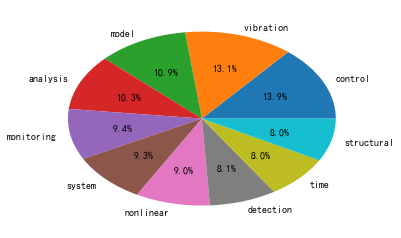

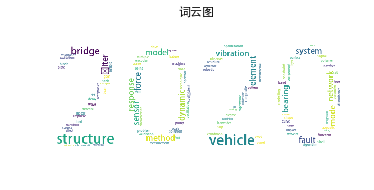

In [245]:
year = input('请输入统计词频年份：')
os.chdir(os.path.join('C:\\Users\\Li\\Desktop\\pdf_download',year))
filename_key = 'Keywords' + year + '.txt'
b = []
def get_text():
    f = open(filename_key,'r',encoding='utf-8')
    text = f.read().lower()
#        print(text)
    for i in '!@#$%^&*()_¯+-;:`~\'"<>=./?,':
            text = text.replace(i,' ')
    return text.split()

ls = get_text()
#     print(ls)
counts = {}
#     print(len(ls))
for i in ls:
     counts[i] = counts.get(i,0) + 1

iteams = list(counts.items())
    # print(iteams)
iteams.sort(key=lambda x:x[1],reverse=True)
    
print(f'{year}年词频最高的10个词为：')
for i in iteams[0:10]:
    print(i)
        
print('\n')

num = input('请输入饼状图展示词频数目：')
labels = []
sizes = []
for i in range(int(num)):
    labels.append(iteams[i][0])
    sizes.append(int(iteams[i][1]))

# print(labels)
# print(sizes)
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.show()
    
from wordcloud import WordCloud
import imageio
image_name = year + '.png'
color_mask =imageio.imread(image_name)
wc = WordCloud(
        background_color="white",  # 背景颜色
        max_words=500,  # 显示最大词数
        font_path="E:\\Solidworks\\SOLIDWORKS\\HoopsPublish\\resource\\Font\\adobeheitistd-regular.otf",  # 使用字体
        min_font_size=5,
        max_font_size=70,
        width=400,
        height=860,
        mask=color_mask) # 图幅宽度

b=[x[0] for x in iteams]     
str_key=' '.join(b) 
i_1=str('out')
# print(str_key)
# print(type(str_key))
wc.generate(str_key)
wc.to_file(str(i_1)+".png")

 
lena = mpimg.imread('out.png') # 读取和代码处于同一目录下的 lena.png
# 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
# lena.shape #(512, 512, 3)
plt.title('词云图')
plt.imshow(lena) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

### 3.5 MSSP近10年所有关键词词频分析、饼状图分析及词云分析

MSSP近10年词频最高的10个词为：
('analysis', 783)
('control', 742)
('vibration', 698)
('model', 598)
('system', 523)
('nonlinear', 504)
('fault', 453)
('monitoring', 427)
('modal', 404)
('time', 397)




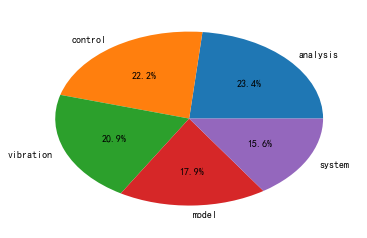

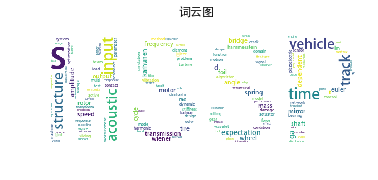

In [251]:
year_list = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
os.chdir('C:\\Users\\Li\\Desktop\\pdf_download')
f_all = open('keywords_all.txt','w',encoding='utf-8')
for year in year_list:
    os.chdir(os.path.join('C:\\Users\\Li\\Desktop\\pdf_download',year))
    filename_key = 'Keywords' + year + '.txt'
    f = open(filename_key,'r',encoding='utf-8')
    key_con = f.read()
    f_all.write(key_con)
    f.close()
        
f_all.close()

b = []
def get_text():
    f = open('keywords_all.txt','r',encoding='utf-8')
    text = f.read().lower()
#        print(text)
    for i in '!@#$%^&*()_¯+-;:`~\'"<>=./?,':
            text = text.replace(i,' ')
    return text.split()
os.chdir('C:\\Users\\Li\\Desktop\\pdf_download')
ls = get_text()
#     print(ls)
counts = {}
#     print(len(ls))
for i in ls:
     counts[i] = counts.get(i,0) + 1

iteams = list(counts.items())
    # print(iteams)
iteams.sort(key=lambda x:x[1],reverse=True)
    
print(f'MSSP近10年词频最高的10个词为：')
for i in iteams[0:10]:
    print(i)
        
print('\n')

num = input('请输入饼状图展示词频数目：')
labels = []
sizes = []
for i in range(int(num)):
    labels.append(iteams[i][0])
    sizes.append(int(iteams[i][1]))

# print(labels)
# print(sizes)
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.show()
    
from wordcloud import WordCloud
import imageio
image_name = 'MSSP.png'
color_mask =imageio.imread(image_name)
wc = WordCloud(
        background_color="white",  # 背景颜色
        max_words=500,  # 显示最大词数
        font_path="E:\\Solidworks\\SOLIDWORKS\\HoopsPublish\\resource\\Font\\adobeheitistd-regular.otf",  # 使用字体
        min_font_size=5,
        max_font_size=70,
        width=400,
        height=860,
        mask=color_mask) # 图幅宽度

b=[x[0] for x in iteams]     
str_key=' '.join(b) 
i_1=str('out')
# print(str_key)
# print(type(str_key))
wc.generate(str_key)
wc.to_file(str(i_1)+".png")

 
lena = mpimg.imread('out.png') # 读取和代码处于同一目录下的 lena.png
# 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
# lena.shape #(512, 512, 3)
plt.title('词云图')
plt.imshow(lena) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()


### 3.6 关键词deep近10年出现情况分析

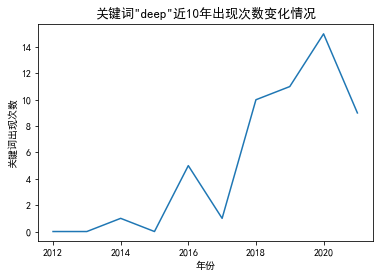

In [228]:
keyword = input('请输入需要分析的关键词：')
# keyword = 'learning'
year_list = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
num_key = np.zeros(len(year_list))
j = 0
for year in year_list:
    os.chdir(os.path.join('C:\\Users\\Li\\Desktop\\pdf_download',year))
    filename_key = 'Keywords' + year + '.txt'
    def get_text():
        f = open(filename_key,'r',encoding='utf-8')
        text = f.read().lower()
#         print(text)
        for i in '!@#$%^&*()_¯+-;:`~\'"<>=./?,':
            text = text.replace(i,' ')
        return text.split()

    ls = get_text()
#     print(ls)
    counts = {}
#     print(len(ls))
    for i in ls:
        counts[i] = counts.get(i,0) + 1

    iteams = list(counts.items())
    x = []
    b = []
    # print(iteams)
    iteams.sort(key=lambda x:x[1],reverse=True)
    b=[x[0] for x in iteams]
    try:
        index_key = b.index(keyword)
        num_key[j] = iteams[index_key][1]
        j = j + 1
    except:
        j = j + 1
    
x = np.linspace(2012,2021,10,dtype=int)
y = num_key
plt.plot(x,y)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xlabel('年份', fontsize=10)
plt.ylabel('关键词出现次数', fontsize=10)
# 设置图例文字大小
plt.title(f'关键词"{keyword}"近10年出现次数变化情况',fontsize=13)
# 设置xy轴刻度文字大小
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### 3.7 关键词signal近10年出现情况分析

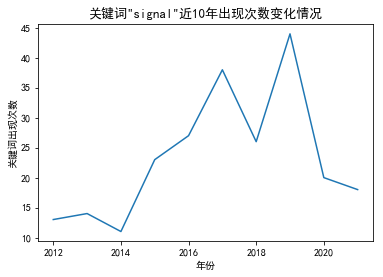

In [230]:
keyword = input('请输入需要分析的关键词：')
# keyword = 'learning'
year_list = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
num_key = np.zeros(len(year_list))
j = 0
for year in year_list:
    os.chdir(os.path.join('C:\\Users\\Li\\Desktop\\pdf_download',year))
    filename_key = 'Keywords' + year + '.txt'
    def get_text():
        f = open(filename_key,'r',encoding='utf-8')
        text = f.read().lower()
#         print(text)
        for i in '!@#$%^&*()_¯+-;:`~\'"<>=./?,':
            text = text.replace(i,' ')
        return text.split()

    ls = get_text()
#     print(ls)
    counts = {}
#     print(len(ls))
    for i in ls:
        counts[i] = counts.get(i,0) + 1

    iteams = list(counts.items())
    x = []
    b = []
    # print(iteams)
    iteams.sort(key=lambda x:x[1],reverse=True)
    b=[x[0] for x in iteams]
    try:
        index_key = b.index(keyword)
        num_key[j] = iteams[index_key][1]
        j = j + 1
    except:
        j = j + 1
    
x = np.linspace(2012,2021,10,dtype=int)
y = num_key
plt.plot(x,y)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xlabel('年份', fontsize=10)
plt.ylabel('关键词出现次数', fontsize=10)
# 设置图例文字大小
plt.title(f'关键词"{keyword}"近10年出现次数变化情况',fontsize=13)
# 设置xy轴刻度文字大小
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()